In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	31675.3720

Best Fitness:	8619.5822
Solution:	100.0000
Diff:		8519.5822

[0:02:45][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	48092.3749

Best Fitness:	8508.3938
Solution:	100.0000
Diff:		8408.3938

[0:05:06][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	70094.0565

Best Fitness:	13866.8462
Solution:	100.0000
Diff:		13766.8462

[0:07:29][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	50201.0877

Best Fitness:	10968.7563
Solution:	100.0000
Diff:		10868.7563

[0:09:51][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	65647.5787

Best Fitness:	14854.7782
Solution:	100.0000
Diff:		14754.7782

[0:12:11][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	106924.7778

Best Fitness:	26321.6237
Solution:	100.0000
Diff:		26221.6237

[0:14:35][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	95141.0040

Best Fitness:	20111.2120
Solution:	100.0000
Diff:		20011.2120

[0:16:57][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	95108.3578

Best Fitness:	20718.9417
Solution:	100.0000
Diff:		20618.9417

[0:19:17][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	83266.5310

Best Fitness:	15627.3353
Solution:	100.0000
Diff:		15527.3353

[0:21:38][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	102104.6791

Best Fitness:	24359.0398
Solution:	100.0000
Diff:		24259.0398

[0:24:01][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	45296.7907

Best Fitness:	9364.1892
Solution:	100.0000
Diff:		9264.1892

[0:26:24][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	69286.0321

Best Fitness:	12864.9593
Solution:	100.0000
Diff:		12764.9593

[0:28:35][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	114402.8912

Best Fitness:	30424.9739
Solution:	100.0000
Diff:		30324.9739

[0:30:42][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	74473.9081

Best Fitness:	14611.9854
Solution:	100.0000
Diff:		14511.9854

[0:32:49][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	36221.9910

Best Fitness:	9105.1096
Solution:	100.0000
Diff:		9005.1096

[0:34:57][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	74967.8834

Best Fitness:	17346.1479
Solution:	100.0000
Diff:		17246.1479

[0:37:02][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	70472.7435

Best Fitness:	9024.2998
Solution:	100.0000
Diff:		8924.2998

[0:39:09][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	82432.2440

Best Fitness:	18974.1749
Solution:	100.0000
Diff:		18874.1749

[0:41:14][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	65203.6684

Best Fitness:	12785.3903
Solution:	100.0000
Diff:		12685.3903

[0:43:21][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	136976.3932

Best Fitness:	25069.5331
Solution:	100.0000
Diff:		24969.5331

[0:45:28][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	100454.3663

Best Fitness:	25439.6376
Solution:	100.0000
Diff:		25339.6376

[0:47:34][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	65481.1307

Best Fitness:	21441.0649
Solution:	100.0000
Diff:		21341.0649

[0:49:43][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	35606.2373

Best Fitness:	6626.7783
Solution:	100.0000
Diff:		6526.7783

[0:51:57][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	90242.1402

Best Fitness:	17730.3857
Solution:	100.0000
Diff:		17630.3857

[0:54:03][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	95049.8828

Best Fitness:	25489.0995
Solution:	100.0000
Diff:		25389.0995

[0:56:11][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	67278.1274

Best Fitness:	12568.7910
Solution:	100.0000
Diff:		12468.7910

[0:58:04][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	71186.3038

Best Fitness:	20646.9458
Solution:	100.0000
Diff:		20546.9458

[0:59:58][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	122349.1683

Best Fitness:	21816.8648
Solution:	100.0000
Diff:		21716.8648

[1:01:50][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	79481.6564

Best Fitness:	13305.7014
Solution:	100.0000
Diff:		13205.7014

[1:03:42][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	56074.6357

Best Fitness:	16419.1045
Solution:	100.0000
Diff:		16319.1045

[1:05:34][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	207508.8243

Best Fitness:	60412.5440
Solution:	100.0000
Diff:		60312.5440

[1:07:25][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	123468.0395

Best Fitness:	25004.5530
Solution:	100.0000
Diff:		24904.5530

[1:09:20][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	56387.4985

Best Fitness:	8351.8209
Solution:	100.0000
Diff:		8251.8209

[1:11:14][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	50046.8418

Best Fitness:	11573.6613
Solution:	100.0000
Diff:		11473.6613

[1:13:06][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	159495.9828

Best Fitness:	39267.7743
Solution:	100.0000
Diff:		39167.7743

[1:14:59][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	90367.2187

Best Fitness:	17002.5718
Solution:	100.0000
Diff:		16902.5718

[1:16:49][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	87639.6592

Best Fitness:	29931.8060
Solution:	100.0000
Diff:		29831.8060

[1:18:41][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	96394.0663

Best Fitness:	20863.6349
Solution:	100.0000
Diff:		20763.6349

[1:20:35][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	70308.3899

Best Fitness:	16316.6914
Solution:	100.0000
Diff:		16216.6914

[1:22:19][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	80302.6779

Best Fitness:	24961.2395
Solution:	100.0000
Diff:		24861.2395

[1:23:59][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	90003.1195

Best Fitness:	21289.5216
Solution:	100.0000
Diff:		21189.5216

[1:25:40][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	43595.8472

Best Fitness:	9357.2445
Solution:	100.0000
Diff:		9257.2445

[1:27:24][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	78680.7517

Best Fitness:	21067.3774
Solution:	100.0000
Diff:		20967.3774

[1:29:03][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	58556.2900

Best Fitness:	16728.4852
Solution:	100.0000
Diff:		16628.4852

[1:30:42][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	57121.5170

Best Fitness:	11549.2116
Solution:	100.0000
Diff:		11449.2116

[1:32:21][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	67748.0491

Best Fitness:	14073.1759
Solution:	100.0000
Diff:		13973.1759

[1:34:00][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	57956.1205

Best Fitness:	14296.5527
Solution:	100.0000
Diff:		14196.5527

[1:35:40][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	42452.1544

Best Fitness:	9954.9709
Solution:	100.0000
Diff:		9854.9709

[1:37:20][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	80934.5916

Best Fitness:	26048.1641
Solution:	100.0000
Diff:		25948.1641

[1:38:59][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	95131.5160

Best Fitness:	25521.2231
Solution:	100.0000
Diff:		25421.2231

[1:40:39][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	92175.8751

Best Fitness:	25805.0854
Solution:	100.0000
Diff:		25705.0854

[1:42:29][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:42:29

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,116595.263724,137265.096984,82536.907787,93909.682315,91847.932482,153802.468150,83506.875746,86898.197214,109824.222537,155577.179295,...,59282.968503,97104.26002,96423.657854,132081.271984,105759.868869,159819.632804,261058.873666,66856.583483,183815.540515,50
127,116595.263724,137265.096984,82536.907787,93909.682315,56161.866863,109292.065665,83506.875746,86898.197214,109824.222537,155577.179295,...,59282.968503,97104.26002,96423.657854,132081.271984,105759.868869,159819.632804,261058.873666,66856.583483,157077.120127,50
128,116595.263724,137265.096984,82536.907787,93909.682315,43472.497707,109292.065665,83506.875746,86898.197214,109824.222537,155577.179295,...,59282.968503,97104.26002,96423.657854,132081.271984,105759.868869,159819.632804,261058.873666,66856.583483,75747.732385,50
129,116595.263724,137265.096984,82536.907787,93909.682315,43472.497707,109292.065665,83506.875746,86898.197214,109824.222537,155577.179295,...,59282.968503,97104.26002,96423.657854,132081.271984,105759.868869,159819.632804,105182.552620,66856.583483,75747.732385,50
130,116595.263724,137265.096984,82536.907787,93909.682315,43472.497707,109292.065665,83506.875746,86898.197214,109824.222537,155577.179295,...,59282.968503,97104.26002,87604.589614,132081.271984,105759.868869,159819.632804,105182.552620,66856.583483,75747.732385,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 8519.58224148252

Best error for run 1: 8408.39383247026

Best error for run 2: 13766.84617271513

Best error for run 3: 10868.756259828084

Best error for run 4: 14754.7781906088

Best error for run 5: 26221.623696346447

Best error for run 6: 20011.21196524847

Best error for run 7: 20618.941729549904

Best error for run 8: 15527.335258187886

Best error for run 9: 24259.03977156861

Best error for run 10: 9264.189161361202

Best error for run 11: 12764.95928168163

Best error for run 12: 30324.973853408865

Best error for run 13: 14511.985365307934

Best error for run 14: 9005.109559748236

Best error for run 15: 17246.147899621104

Best error for run 16: 8924.299837378388

Best error for run 17: 18874.174865809866

Best error for run 18: 12685.390326129684

Best error for run 19: 24969.533106498104

Best error for run 20: 25339.637590846407

Best error for run 21: 21341.06491806213

Best error for run 22: 6526.778309619993

Best error for run 23: 17630.38572390011

Best error for run 24: 25389.099451156737

Best error for run 25: 12468.79100352619

Best error for run 26: 20546.945760000966

Best error for run 27: 21716.86475200322

Best error for run 28: 13205.701357688014

Best error for run 29: 16319.104523158687

Best error for run 30: 60312.54397758643

Best error for run 31: 24904.55298732083

Best error for run 32: 8251.820856980168

Best error for run 33: 11473.661329510775

Best error for run 34: 39167.774305082

Best error for run 35: 16902.571807209286

Best error for run 36: 29831.805978352262

Best error for run 37: 20763.634948363484

Best error for run 38: 16216.691375110116

Best error for run 39: 24861.239467325133

Best error for run 40: 21189.521553676117

Best error for run 41: 9257.244451325743

Best error for run 42: 20967.377398445107

Best error for run 43: 16628.485171678272

Best error for run 44: 11449.211620882275

Best error for run 45: 13973.175918051013

Best error for run 46: 14196.55268363229

Best error for run 47: 9854.970948745127

Best error for run 48: 25948.164124054554

Best error for run 49: 25421.223113405387

Best error for run 50: 25705.085411241384

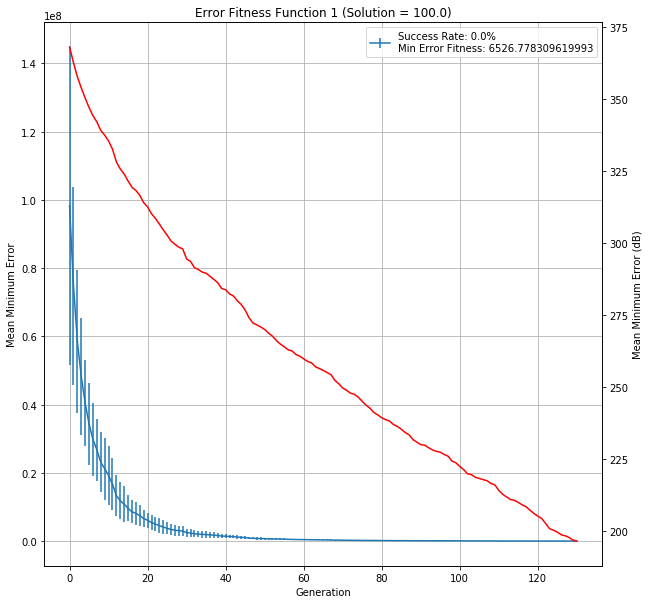

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.4,8519.582241,8408.393832,13766.846173,10868.75626,14754.778191,26221.623696,...,11449.211621,13973.175918,14196.552684,9854.970949,25948.164124,25421.223113,25705.085411,18613.508925,1:42:29,39900
